In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


In [2]:
from google.colab import files
uploaded = files.upload()

Saving commune.xlsx to commune.xlsx
Saving enroll.csv to enroll.csv
Saving industry.csv to industry.csv
Saving ord.csv to ord.csv
Saving quest.csv to quest.csv
Saving study_domain.csv to study_domain.csv
Saving technology.csv to technology.csv
Saving transaction.csv to transaction.csv


# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

In [66]:
commune=pd.read_excel("commune.xlsx")
enroll = pd.read_csv("enroll.csv")
quest = pd.read_csv("quest.csv")
industry = pd.read_csv("industry.csv")
ord = pd.read_csv("ord.csv")
study_domain = pd.read_csv("study_domain.csv")
transaction = pd.read_csv("transaction.csv")
technology = pd.read_csv("technology.csv")

In [67]:
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          250 non-null    int64 
 1   gender              250 non-null    object
 2   dob                 244 non-null    object
 3   commune             250 non-null    object
 4   created_at          250 non-null    object
 5   modified_at         250 non-null    object
 6   department          249 non-null    object
 7   education_level     250 non-null    object
 8   university          250 non-null    object
 9   study_domain        250 non-null    object
 10  current_employed    250 non-null    object
 11  formal_sector_job   250 non-null    object
 12  have_computer_home  250 non-null    object
 13  internet_at_home    250 non-null    object
 14  hear_AA_1           250 non-null    object
 15  after_AA            250 non-null    object
 16  quest_id            250 no

In [177]:
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

tab_1=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
tab_1.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01


In [178]:

transaction['Paid'] = 'Yes'
ord['Paid'] = 'Yes'

x = transaction.loc[:,['Paid','user_id','created_at']]
y = ord.loc[:,['Paid','user_id','created_at']]
trans_ord= pd.concat([x,y],axis=0)
trans_ord= trans_ord.rename(columns={'created_at': 'Payment_Date'})
trans_ord.head()

,Paid,user_id,Payment_Date
0,Yes,40976440,2021-03-08T05:08:50.832Z
1,Yes,41179271,2021-03-08T17:26:35.841Z
2,Yes,40973512,2021-03-08T18:52:09.147Z
3,Yes,41177453,2021-03-08T19:06:32.837Z
4,Yes,40797121,2021-03-08T22:10:00.796Z


In [179]:
enroll.head()
enroll= enroll.rename(columns={'created_at': 'enroll_date'})
enroll['is_enroll'] = 'Yes'

scnd_tab=pd.merge(enroll,trans_ord, how = 'left',on = ['user_id'] )
scnd_tab= scnd_tab.loc[:,['user_id','quest_id','enroll_date','Paid','Payment_Date','is_enroll']]
scnd_tab

tab_3=pd.merge(left=first_tab,right=scnd_tab, how = 'left', on=['quest_id'])
tab_3['is_enroll']= tab_3['is_enroll'].fillna('no')
tab_3['Paid']= tab_3['Paid'].fillna('no')
tab_3.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,user_id,enroll_date,Paid,Payment_Date,is_enroll
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN,39726355.0,2021-02-14T23:15:19.500Z,no,NaN,Yes
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,40117659.0,2021-02-20T21:20:37.450Z,Yes,2021-03-03T23:00:11.974Z,Yes
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no


In [151]:
domain_of_study_1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
domain_of_study_1=domain_of_study_1.groupby("quest_id").sum()
domain_of_study_1
tab_4=pd.merge(left=third_tab,right=domain_of_study_1, how = 'left', on=['quest_id'])
tab_4

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,user_id,enroll_date,Paid,Payment_Date,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN,39726355.0,2021-02-14T23:15:19.500Z,no,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,40117659.0,2021-02-20T21:20:37.450Z,Yes,2021-03-03T23:00:11.974Z,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],Yes,Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06,40734954.0,2021-03-02T18:45:26.479Z,Yes,2021-03-02T18:53:20.759Z,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06,NaN,NaN,no,NaN,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06,41587952.0,2021-03-14T15:34:39.800Z,Yes,2021-03-14T15:34:35.014Z,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],No,unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,Ferrier,HT0412,North-East,HT04,41177453.0,2021-03-08T19:06:32.719Z,Yes,2021-03-08T19:06:32.837Z,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
techno1 = pd.get_dummies(data=technology[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
techno1y=techno1.groupby("quest_id").sum()
techno1y
tab_5=pd.merge(left=tab_4,right=techno1y, how = 'left', on=['quest_id'])
tab_5
tab_5.columns
columns_drop= ['Unnamed: 0','modified_at','current_employed','Commune_Id','Commune_FR','ADM1_PCODE','study_domain','department','university','commune']
final_tab= tab_5.drop(labels=None,columns=columns_drop, level=None, inplace=False)
tab_5.columns

Index(['Unnamed: 0', 'gender', 'dob', 'commune', 'created_at', 'modified_at',
       'department', 'education_level', 'university', 'study_domain',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'hear_AA_1', 'after_AA', 'quest_id', 'Commune_en',
       'Commune_FR', 'Commune_Id', 'Departement', 'ADM1_PCODE', 'user_id',
       'enroll_date', 'Paid', 'Payment_Date', 'is_enroll', 'Accounting',
       'Computer Science', 'Economics', 'Electrical Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'other_x', 'Bash', 'Excel',
       'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R',
       'SQL', 'VBA', 'other_y'],
      dtype='object')

In [181]:
final_tab['dob'] = final_tab['dob'].astype(str)

final_tab['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
final_tab['dob'] = pd.to_datetime(final_tab['dob'])

def Calculate_Age(born) :
    today = date(2021, 6, 18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

final_tab['Age'] = final_tab['dob'].apply(Calculate_Age)
final_tab
lisst=['created_at','enroll_date','Payment_Date']
for i in lisst:
    final_tab[i] =final_tab[i].apply(lambda x : str(x).split("T")[0])

final_tab.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  250 non-null    object        
 1   dob                     244 non-null    datetime64[ns]
 2   created_at              250 non-null    object        
 3   education_level         250 non-null    object        
 4   formal_sector_job       250 non-null    object        
 5   have_computer_home      250 non-null    object        
 6   internet_at_home        250 non-null    object        
 7   hear_AA_1               250 non-null    object        
 8   after_AA                250 non-null    object        
 9   quest_id                250 non-null    object        
 10  Commune_en              248 non-null    object        
 11  Departement             248 non-null    object        
 12  user_id                 102 non-null    float64   

In [182]:
cols=final_tab.iloc[:,16:].columns
for i in cols:
    final_tab[i]= final_tab[i].fillna(0.0)
final_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  250 non-null    object        
 1   dob                     244 non-null    datetime64[ns]
 2   created_at              250 non-null    object        
 3   education_level         250 non-null    object        
 4   formal_sector_job       250 non-null    object        
 5   have_computer_home      250 non-null    object        
 6   internet_at_home        250 non-null    object        
 7   hear_AA_1               250 non-null    object        
 8   after_AA                250 non-null    object        
 9   quest_id                250 non-null    object        
 10  Commune_en              248 non-null    object        
 11  Departement             248 non-null    object        
 12  user_id                 102 non-null    float64   

In [183]:
final_tab['Age'].dtype

dtype('float64')

In [184]:
final_tab['Age'] = final_tab['Age'].astype(float)

In [185]:
final_tab['Age'].dtype

dtype('float64')

In [186]:
final_tab['Age'].value_counts()

 25.0    27
 23.0    23
 26.0    23
 24.0    22
 22.0    19
 27.0    17
 30.0    14
 28.0    14
 29.0    12
 32.0     9
 0.0      9
 21.0     8
 33.0     7
 34.0     7
 31.0     5
 37.0     5
 20.0     4
 38.0     4
 40.0     4
-1.0      3
 44.0     3
 19.0     2
 35.0     2
 46.0     1
 50.0     1
 39.0     1
 48.0     1
 1.0      1
 45.0     1
 36.0     1
Name: Age, dtype: int64

In [187]:
final_tab[(final_tab['Age'] == 1.0) | (final_tab['Age'] == 0) |(final_tab['Age'] == -1)][["education_level", "quest_id", "Age"]]

,education_level,quest_id,Age
25,High School (16 years),906036c8-ce95-11eb-8c78-7c67a234f601,0.0
35,Other,9060e347-ce95-11eb-abbb-7c67a234f601,0.0
58,Bachelors (bacc +4),906241d5-ce95-11eb-9850-7c67a234f601,0.0
92,Other,9064923b-ce95-11eb-a771-7c67a234f601,-1.0
116,Bachelors (bacc +4),9065822a-ce95-11eb-9df5-7c67a234f601,0.0
154,Bachelors (bacc +4),9066fab1-ce95-11eb-a4e2-7c67a234f601,0.0
176,Bachelors (bacc +4),9067e4c0-ce95-11eb-bebe-7c67a234f601,0.0
194,Bachelors (bacc +4),90691afb-ce95-11eb-a4c3-7c67a234f601,0.0
209,Other,9069a205-ce95-11eb-be5a-7c67a234f601,1.0
210,Other,9069a206-ce95-11eb-9c6f-7c67a234f601,0.0


In [188]:
drop_data = final_tab[(final_tab['Age'] == 1.0) | (final_tab['Age'] == 0) |(final_tab['Age'] == -1)]
drop_data

,gender,dob,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Departement,user_id,enroll_date,Paid,Payment_Date,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Age
25,male,2021-02-28,2021-02-19,High School (16 years),Yes,Yes,Yes,WhatsApp,Mentorship,906036c8-ce95-11eb-8c78-7c67a234f601,Port-au-Prince,West,NaN,nan,no,nan,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,male,NaT,2021-02-23,Other,unknown,Yes,Yes,WhatsApp,Training to start my own company,9060e347-ce95-11eb-abbb-7c67a234f601,Port-au-Prince,West,40299599.0,2021-02-23,Yes,2021-02-25,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58,male,NaT,2021-03-14,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,other,906241d5-ce95-11eb-9850-7c67a234f601,Port-au-Prince,West,41569249.0,2021-03-14,Yes,2021-03-14,Yes,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
92,male,2021-08-14,2021-02-18,Other,unknown,Yes,Yes,Friend,Improving my data analysis skills,9064923b-ce95-11eb-a771-7c67a234f601,Delmas,West,NaN,nan,no,nan,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0
116,female,NaT,2021-03-03,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,9065822a-ce95-11eb-9df5-7c67a234f601,Delmas,West,NaN,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,female,NaT,2021-02-18,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Finding a job/internship,9066fab1-ce95-11eb-a4e2-7c67a234f601,Carrefour,West,39979118.0,2021-02-18,no,nan,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,male,2021-02-18,2021-02-19,Bachelors (bacc +4),unknown,Yes,No,WhatsApp,Training to start my own company,9067e4c0-ce95-11eb-bebe-7c67a234f601,Petion-Ville,West,NaN,nan,no,nan,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
194,male,NaT,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,WhatsApp,Training to start my own company,90691afb-ce95-11eb-a4c3-7c67a234f601,Croix-Des-Bouquets,West,41328544.0,2021-03-13,Yes,2021-03-13,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
209,female,2020-01-22,2021-02-16,Other,unknown,No,No,WhatsApp,Improving my data analysis skills,9069a205-ce95-11eb-be5a-7c67a234f601,Les Cayes,South,NaN,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210,female,2021-05-08,2021-02-17,Other,unknown,Yes,Yes,ESIH,Improving my data analysis skills,9069a206-ce95-11eb-9c6f-7c67a234f601,Cite Soleil,West,NaN,nan,no,nan,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [189]:
#drop_data = final_tab[(final_tab['Age'] == 1.0) | (final_tab['Age'] == 0) |(final_tab['Age'] == -1)]
#final_tab2 = final_tab[final_tab['Age']>2]
final_tab_OK = final_tab.drop(index = drop_data.index).reset_index()
final_tab_OK

,index,gender,dob,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Departement,user_id,enroll_date,Paid,Payment_Date,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Age
0,0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,39726355.0,2021-02-14,no,nan,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,NaN,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.0
2,2,male,1996-05-17,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,West,40117659.0,2021-02-20,Yes,2021-03-03,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,25.0
3,3,male,1996-11-24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,West,NaN,nan,no,nan,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0
4,4,male,1997-07-20,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,West,NaN,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,245,male,1994-02-15,2021-03-02,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Centre,40734954.0,2021-03-02,Yes,2021-03-02,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
233,246,male,1990-08-10,2021-03-10,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Centre,NaN,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0
234,247,male,1993-12-28,2021-03-14,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Centre,41587952.0,2021-03-14,Yes,2021-03-14,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,27.0
235,248,male,1992-04-17,2021-03-08,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,North-East,41177453.0,2021-03-08,Yes,2021-03-08,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0


In [190]:

#final_tab.reset_index()

In [191]:
#final_tab.shape
final_tab_OK.shape

(237, 40)

In [192]:
#final_tab2.shape

In [193]:
mean_data = final_tab_OK['Age'].mean()
mean_data

27.544303797468356

In [194]:
#.replace({1: mean_data_without_7, 0:mean_data_without_7, -1:mean_data_without_7},inplace = True)
drop_data['Age'] = mean_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [195]:

drop_data['Age']
#final_tab2 = pd.concat([final_tab, drop_data], axis = 0)


25     27.544304
35     27.544304
58     27.544304
92     27.544304
116    27.544304
154    27.544304
176    27.544304
194    27.544304
209    27.544304
210    27.544304
219    27.544304
221    27.544304
229    27.544304
Name: Age, dtype: float64

In [88]:
final_tab_OK.shape

(237, 40)

In [89]:
#drop_data.reset_index()
drop_data.shape

(13, 39)

In [90]:
final_tab = pd.concat([final_tab_OK,drop_data], axis =0 )
final_tab.shape

(250, 40)

In [196]:
final_tab['Age']

0      22.0
1      24.0
2      25.0
3      24.0
4      23.0
       ... 
245    27.0
246    30.0
247    27.0
248    29.0
249    27.0
Name: Age, Length: 250, dtype: float64

In [92]:
final_tab.reset_index()

,level_0,index,gender,dob,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Departement,user_id,enroll_date,Paid,Payment_Date,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Age
0,0,0.0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,39726355.0,2021-02-14,no,nan,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.000000
1,1,1.0,female,1996-09-29,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,NaN,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.000000
2,2,2.0,male,1996-05-17,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,West,40117659.0,2021-02-20,Yes,2021-03-03,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,25.000000
3,3,3.0,male,1996-11-24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,West,NaN,nan,no,nan,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.000000
4,4,4.0,male,1997-07-20,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,West,NaN,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,209,NaN,female,2020-01-22,2021-02-16,Other,unknown,No,No,WhatsApp,Improving my data analysis skills,9069a205-ce95-11eb-be5a-7c67a234f601,Les Cayes,South,NaN,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.544304
246,210,NaN,female,2021-05-08,2021-02-17,Other,unknown,Yes,Yes,ESIH,Improving my data analysis skills,9069a206-ce95-11eb-9c6f-7c67a234f601,Cite Soleil,West,NaN,nan,no,nan,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,27.544304
247,219,NaN,male,2021-07-25,2021-02-19,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Finding a job/internship,9069ddd8-ce95-11eb-b0fb-7c67a234f601,Sainte Suzanne,North-East,NaN,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.544304
248,221,NaN,male,NaT,2021-02-19,High School (16 years),unknown,Yes,Yes,LinkedIn,Improving my data analysis skills,906a04c9-ce95-11eb-8f6a-7c67a234f601,Mombin Crochu,North-East,NaN,nan,no,nan,no,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.544304


In [93]:
final_tab_OK['Age'].mean()

27.544303797468356

In [197]:
move = final_tab.pop('Age')
final_tab.insert(2,'Age',move)
final_tab['Age'] = final_tab['Age'].fillna(final_tab['Age'].mean())
final_tab['Age'] = final_tab['Age'].astype(int)
final_tab = final_tab.drop(columns=['user_id','dob'],axis=1)
final_tab

,gender,Age,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Departement,enroll_date,Paid,Payment_Date,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y
0,male,22,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,2021-02-14,no,nan,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,female,24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,male,25,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,West,2021-02-20,Yes,2021-03-03,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,male,24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,West,nan,no,nan,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,male,23,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,West,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,27,2021-03-02,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Centre,2021-03-02,Yes,2021-03-02,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,male,30,2021-03-10,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Centre,nan,no,nan,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
247,male,27,2021-03-14,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Centre,2021-03-14,Yes,2021-03-14,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
248,male,29,2021-03-08,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,North-East,2021-03-08,Yes,2021-03-08,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###  1. How many observations and variables are there in the dataset
 

In [170]:
# here your codes
final_tab.shape
print('The number of observations in the dataset is:',final_tab.shape[0])
print('The number of variables in the dataset is:',final_tab.shape[1])

The number of observations in the dataset is: 250
The number of variables in the dataset is: 38


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [198]:
# here your codes
avg=final_tab['Age'].mean()
print('The average age of the observations in the whole dataset is', np.round(avg,2), 'years old')
avg_male=final_tab[final_tab['gender']== 'male'].Age.mean()
print('The average age of the observations for the male is', np.round(avg_male,2), 'years old')
avg_female=final_tab[final_tab['gender']== 'female'].Age.mean()
print('The average age of the observations for the female is', np.round(avg_female,2), 'years old','\n')

var=final_tab['Age'].var()
print('The age variance of the observations in the whole dataset is', np.round(var,2))
var_male=final_tab[final_tab['gender']== 'male'].Age.var()
print('The age variance of the observations for the male is', np.round(var_male,2))
var_female=final_tab[final_tab['gender']== 'female'].Age.var()
print('The age variance  of the observations for the female is', np.round(var_female,2),'\n')

kurtosis=final_tab['Age'].kurtosis()
print('The kurtosis of the age distribution the whole dataset is', np.round(kurtosis,2))
kurtosis_male=final_tab[final_tab['gender']== 'male'].Age.kurtosis()
print('The kurtosis of the age distribution for the male is', np.round(kurtosis_male,2))
kurtosis_female=final_tab[final_tab['gender']== 'female'].Age.kurtosis()
print('The kurtosis of the age distributionfor the female is', np.round(kurtosis_female,2),'\n')

skewness=final_tab['Age'].skew()
print('The skewness age of the distribution in the whole dataset is', np.round(skewness,2))
skewness_male=final_tab[final_tab['gender']== 'male'].Age.skew()
print('The skewness age of the distribution for the male is', np.round(skewness_male,2))
skewness_female=final_tab[final_tab['gender']== 'female'].Age.skew()
print('The skewness age of the distribution for the female is', np.round(skewness_female,2),'\n')

The average age of the observations in the whole dataset is 26.1 years old
The average age of the observations for the male is 26.53 years old
The average age of the observations for the female is 24.26 years old 

The age variance of the observations in the whole dataset is 67.45
The age variance of the observations for the male is 63.35
The age variance  of the observations for the female is 82.63 

The kurtosis of the age distribution the whole dataset is 4.0
The kurtosis of the age distribution for the male is 4.45
The kurtosis of the age distributionfor the female is 3.03 

The skewness age of the distribution in the whole dataset is -1.07
The skewness age of the distribution for the male is -1.07
The skewness age of the distribution for the female is -1.02 



In [97]:
#Testing the distribution for normality
from scipy.stats import shapiro
print("Shapiro-Wilk Test for whole dataset: ",shapiro(final_tab['Age']))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(final_tab[final_tab['gender']== 'male'].Age))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(final_tab[final_tab['gender']== 'female'].Age))

Shapiro-Wilk Test for whole dataset:  (0.8862147331237793, 9.421861077787974e-13)
Shapiro-Wilk Test for whole dataset:  (0.8981670141220093, 1.5403946174163963e-10)
Shapiro-Wilk Test for whole dataset:  (0.8017902374267578, 1.7407411405656603e-06)


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

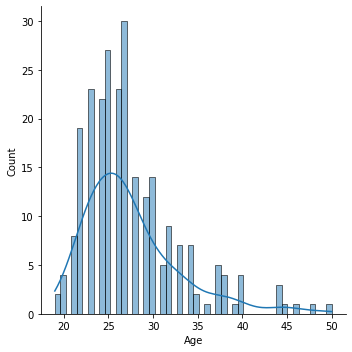

In [98]:
bins = 50
sns.displot(final_tab['Age'],bins = bins,kde = True)

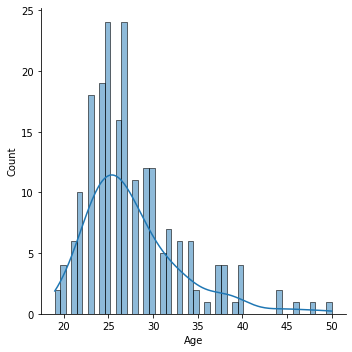

In [99]:
sns.displot(final_tab[final_tab['gender']== 'male'].Age, bins = bins,kde = True)

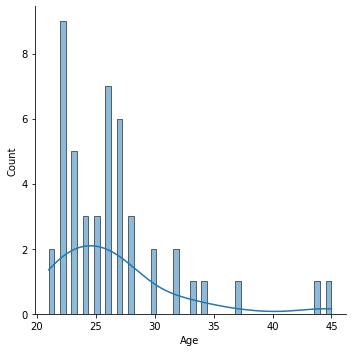

In [100]:
sns.displot(final_tab[final_tab['gender']== 'female'].Age,bins= bins,kde = True)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [101]:
#here your codes
# H0 : Mu = 24 
# H1 : Mu != 24
from scipy.stats import wilcoxon
stat, p = wilcoxon(final_tab.Age - 24)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
	print('ho mu=24 (fail to reject H0)')
else:
	print('h1 mu!= 24 (reject H0)')

Statistics=3706.00, p=0.00
h1 mu!= 24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Boxplot of applicants by communication channels')

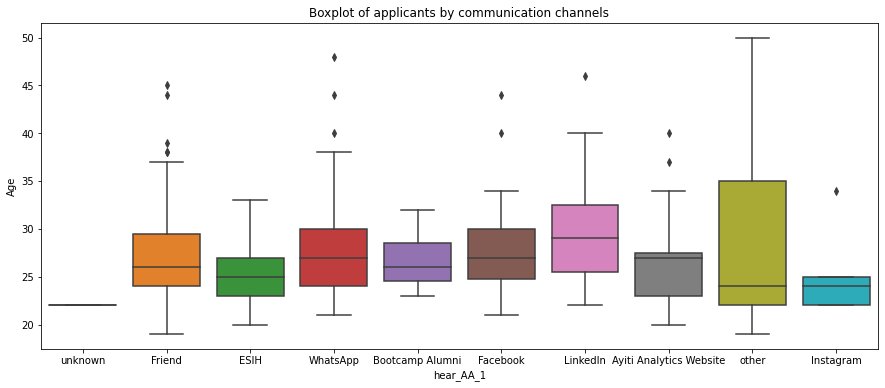

In [102]:
#here your codes
plt.figure(figsize=(15,6))
sns.boxplot(data=final_tab,x="hear_AA_1",y="Age")
plt.title('Boxplot of applicants by communication channels')

In [103]:
#here your codes
display( final_tab['Age'].groupby(by= final_tab['hear_AA_1']).mean())

hear_AA_1
Ayiti Analytics Website    27.200000
Bootcamp Alumni            26.642857
ESIH                       25.333333
Facebook                   27.700000
Friend                     27.268657
Instagram                  25.400000
LinkedIn                   30.266667
WhatsApp                   27.969697
other                      28.666667
unknown                    22.000000
Name: Age, dtype: float64

### 7 .Is there a significant age difference between these groups

In [104]:
Facebook_list_age = final_tab[final_tab['hear_AA_1'] == 'Facebook']['Age'].values
Unknown_list_age = final_tab[final_tab['hear_AA_1'] == 'unknown']['Age'].values
Friend_list_age = final_tab[final_tab['hear_AA_1'] == 'Friend']['Age'].values
ESIH_list_age = final_tab[final_tab['hear_AA_1'] == 'ESIH']['Age'].values
WhatsApp_list_age = final_tab[final_tab['hear_AA_1'] == 'WhatsApp']['Age'].values
Bootcamp_Alumni_list_age = final_tab[final_tab['hear_AA_1'] == 'Bootcamp Alumni']['Age'].values
LinkedIn_list_age = final_tab[final_tab['hear_AA_1'] == 'LinkedIn']['Age'].values
Ayiti_Analytics_Website_list_age = final_tab[final_tab['hear_AA_1'] == 'Ayiti Analytics Website']['Age'].values
other_list_age = final_tab[final_tab['hear_AA_1'] == 'other']['Age'].values
Instagram_list_age = final_tab[final_tab['hear_AA_1'] == 'Instagram']['Age'].values




In [105]:
#here your codes
# Ho : There is no difference between the mean of these groups
# h1 : There is a difference between the mean of these groups

stat, p = f_oneway(Facebook_list_age, Unknown_list_age, Friend_list_age, ESIH_list_age, WhatsApp_list_age, Bootcamp_Alumni_list_age, LinkedIn_list_age, Ayiti_Analytics_Website_list_age, other_list_age, Instagram_list_age)
print(p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")


0.3510287573324228
Hypothesis Accepted


### 8.Plan a BA strategy for each communication channel regarding the age group

In [106]:
#here your codes

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [107]:
#here your codes
res =final_tab.gender.value_counts(normalize=True).to_frame()
display(res)
gender_table = pd.pivot_table(final_tab,'Age',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)

my_pivot['Probabilty of being female and being in each communications channels'] =gender_table[('count','female')]/final_tab.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/final_tab.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being female and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)

my_pivot['male'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["male","gender"]
my_pivot['female'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["female","gender"]
my_pivot.loc[:,['female']]

,gender
male,0.812
female,0.188


,Probabilty of being female and being in each communications channels,Probabilty of being male and being in each communications channels
gender,,
hear_AA_1,,
Friend,0.044,0.224
WhatsApp,0.036,0.228
Bootcamp Alumni,0.032,0.024
Facebook,0.024,0.136
ESIH,0.020,0.052
Ayiti Analytics Website,0.016,0.044
other,0.008,0.028
Instagram,0.004,0.016


,female
gender,
hear_AA_1,
Friend,0.234043
WhatsApp,0.191489
Bootcamp Alumni,0.170213
Facebook,0.127660
ESIH,0.106383
Ayiti Analytics Website,0.085106
other,0.042553
Instagram,0.021277


### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [108]:
#here your codes
my_pivot.loc[:,['male']]

,male
gender,
hear_AA_1,
Friend,0.275862
WhatsApp,0.280788
Bootcamp Alumni,0.029557
Facebook,0.167488
ESIH,0.064039
Ayiti Analytics Website,0.054187
other,0.034483
Instagram,0.019704


### 11. Deduce the probability of being a woman knowing each communication channel

In [120]:
#here your codes
communication_table = pd.pivot_table(final_tab,'Age',index='hear_AA_1',columns='gender',aggfunc = ['count'],fill_value=0,margins = True)
pw = communication_table.iloc[:-1,-1].to_frame()

pw[('count','All')] = pw[('count','All')]/final_tab.shape[0]
pw['Probability of being in each channel of communication knowing your are a woman']= my_pivot.loc[:,['female']]
pw['Probability of being a female knowing each communication channels']= (pw['Probability of being in each channel of communication knowing your are a woman'] * (0.188))/v[('count','All')]
pw

,count,Probability of being in each channel of communication knowing your are a woman,Probability of being a female knowing each communication channels
,All,,
hear_AA_1,,,
Ayiti Analytics Website,0.060,0.085106,0.266667
Bootcamp Alumni,0.056,0.170213,0.571429
ESIH,0.072,0.106383,0.277778
Facebook,0.160,0.127660,0.150000
Friend,0.268,0.234043,0.164179
Instagram,0.020,0.021277,0.200000
LinkedIn,0.060,0.021277,0.066667
WhatsApp,0.264,0.191489,0.136364


### 12. Deduce the probability of being a man knowing each communication channel

In [122]:
#here your codes
pm = communication_table.iloc[:-1,-1].to_frame()

pm[('count','All')] = pm[('count','All')]/final_tab.shape[0]
pm['Probability of being in each channel of communication knowing your are a man']= my_pivot.loc[:,['male']]
pm['Probability of being a male knowing each communication channels']= (pm['Probability of being in each channel of communication knowing your are a man'] * (0.188))/v[('count','All')]
pm


,count,Probability of being in each channel of communication knowing your are a man,Probability of being a male knowing each communication channels
,All,,
hear_AA_1,,,
Ayiti Analytics Website,0.060,0.054187,0.169787
Bootcamp Alumni,0.056,0.029557,0.099226
ESIH,0.072,0.064039,0.167214
Facebook,0.160,0.167488,0.196798
Friend,0.268,0.275862,0.193515
Instagram,0.020,0.019704,0.185222
LinkedIn,0.060,0.068966,0.216092
WhatsApp,0.264,0.280788,0.199955


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

In [123]:
#here
channel_gender = pd.pivot_table(final_tab,'Age',index='hear_AA_1',columns=['after_AA'],aggfunc = ['count'],fill_value=0,margins = True)
channel_gender
stat, p, dof,s= chi2_contingency(channel_gender) 
print("p value: " + str(p)) 
if p <= 0.05: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 1.2931351228431785e-10
Reject NULL HYPOTHESIS


In [124]:
from scipy.stats import chi2_contingency
stat, p, dof,s= chi2_contingency(com_table) 
print("p value: " + str(p)) 
if p <= 0.05: 
  print('Reject NULL HYPOTHESIS') 
else: 
  print('ACCEPT NULL HYPOTHESIS') 

p value: 1.2931351228431785e-10
Reject NULL HYPOTHESIS


### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


p value: 0.5496916447443122
ACCEPT NULL HYPOTHESIS


<Figure size 360x1080 with 0 Axes>

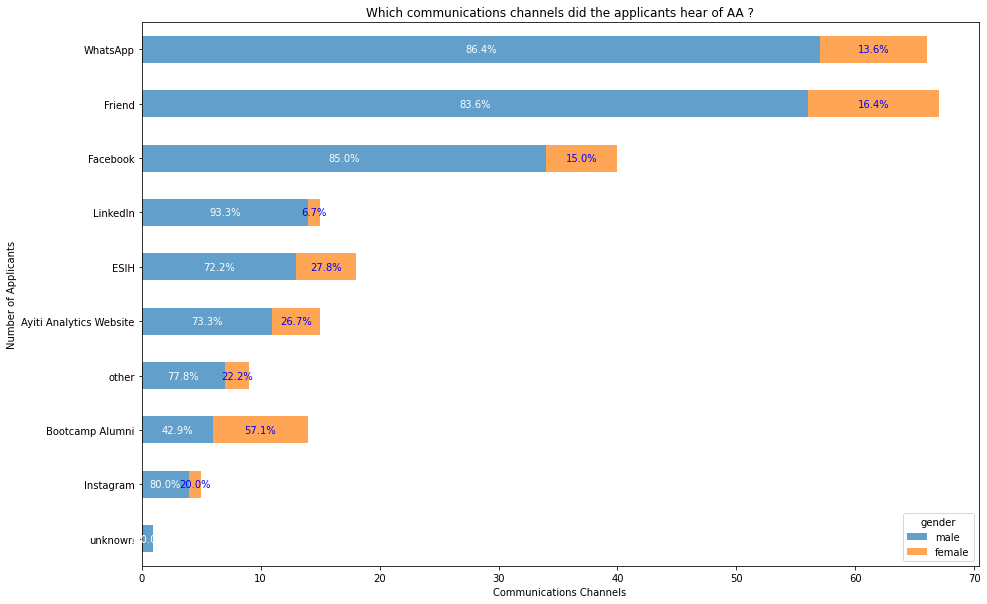

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


In [126]:
# here your codes
def bootcamp_channel_test(data=final_tab,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):
  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values="Age",aggfunc="count",fill_value=0,margins = True)
  display(result1)
  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else: 
    print('ACCEPT NULL HYPOTHESIS') 
  # Force the aspect ratio of the blocks to be equal using "square" parameter
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(result1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    values = result1.iloc[:-1,:].sort_values(by =('male'),ascending=True)
    ax =values.sort_values(by =('male'),ascending=True)[[('male'),('female')]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
    ylab = ax.set_ylabel('Number of Applicants')
    xlab = ax.set_xlabel('Communications Channels')
    title = ax.set_title('Which communications channels did the applicants hear of AA ?')

    index =0
    for male, female ,total in zip(values[('male')],values[('female')], values[('All')]):
      if male != total and  female != total  :
        ax.text(male/2 ,
                index,
                str(np.round((male/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
                )
        ax.text(male + female/2 ,
              index,
              str(np.round((female/total)*100,1)) + "%",
              fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
            )
      elif female == total:
        ax.text(female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )
      else:
        ax.text(male/2 ,
            index,
            str(np.round((male/total)*100,1)) + "%",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )       
   
    
      index+=1
  plt.show()
  return result1
bootcamp_channel_test(final_tab,columns=['hear_AA_1','gender'],significance_level=0.05,figsize=(5,15),heatmap=False)  

### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [114]:
#here your codes

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [127]:
val = pd.pivot_table(data=final_tab[final_tab['Paid'] == 'Yes'],columns='after_AA',index=['Paid','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
val = val /final_tab[final_tab['Paid'] == 'Yes'].shape[0]
val

after_AA                             Finding a job/internship  ...       All
Paid hear_AA_1               gender                            ...          
Yes  Ayiti Analytics Website male                    0.015385  ...  0.046154
     Bootcamp Alumni         female                  0.015385  ...  0.046154
                             male                    0.000000  ...  0.076923
     ESIH                    male                    0.015385  ...  0.061538
     Facebook                female                  0.000000  ...  0.030769
                             male                    0.015385  ...  0.107692
     Friend                  female                  0.015385  ...  0.046154
                             male                    0.030769  ...  0.292308
     Instagram               male                    0.015385  ...  0.015385
     LinkedIn                female                  0.000000  ...  0.015385
                             male                    0.015385  ...  0.030769
     WhatsApp                female                  0.015385  ...  0.061538
                             male                    0.046154  ...  0.138462
     other                   female                  0.000000  ...  0.015385
                             male                    0.000000  ...  0.015385
All                                                  0.200000  ...  1.000000

[16 rows x 7 columns]

In [128]:
vall  = pd.pivot_table(data=final_tab[final_tab['Paid'] == 'no'],columns='after_AA',index=['Paid','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
vall = vall /final_tab[final_tab['Paid'] == 'no'].shape[0]
vall

after_AA                             Finding a job/internship  ...       All
Paid hear_AA_1               gender                            ...          
no   Ayiti Analytics Website female                  0.000000  ...  0.021622
                             male                    0.000000  ...  0.043243
     Bootcamp Alumni         female                  0.010811  ...  0.027027
                             male                    0.000000  ...  0.005405
     ESIH                    female                  0.000000  ...  0.027027
                             male                    0.005405  ...  0.048649
     Facebook                female                  0.010811  ...  0.021622
                             male                    0.037838  ...  0.145946
     Friend                  female                  0.016216  ...  0.043243
                             male                    0.021622  ...  0.200000
     Instagram               female                  0.000000  ...  0.005405
                             male                    0.005405  ...  0.016216
     LinkedIn                male                    0.005405  ...  0.064865
     WhatsApp                female                  0.000000  ...  0.027027
                             male                    0.037838  ...  0.259459
     other                   female                  0.000000  ...  0.005405
                             male                    0.010811  ...  0.032432
     unknown                 male                    0.000000  ...  0.005405
All                                                  0.162162  ...  1.000000

[19 rows x 8 columns]

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [132]:
# here your codes
a = pd.pivot_table(data=final_tab,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
a=final_tab[final_tab['Paid'] == 'Yes'].shape[0]/a
b = result12*a
b = b.fillna("-")
display(b)
b.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']

after_AA                                  All  ... unknown
hear_AA_1               gender Paid            ...        
                               All          -  ...       -
All                            NaN          -  ...       -
Ayiti Analytics Website female NaN          -  ...       -
                        male   Yes   0.272727  ...       -
Bootcamp Alumni         female Yes      0.375  ...       -
                        male   Yes   0.833333  ...       -
ESIH                    female NaN          -  ...       -
                        male   Yes   0.307692  ...       -
Facebook                female Yes   0.333333  ...       -
                        male   Yes   0.205882  ...       -
Friend                  female Yes   0.272727  ...       -
                        male   Yes   0.339286  ...       -
Instagram               female NaN          -  ...       -
                        male   Yes       0.25  ...       -
LinkedIn                female Yes          1  ...       -
                        male   Yes   0.142857  ...       -
WhatsApp                female Yes   0.444444  ...       -
                        male   Yes   0.157895  ...       -
other                   female Yes        0.5  ...       -
                        male   Yes   0.142857  ...       -
unknown                 male   NaN          -  ...       -

[21 rows x 8 columns]

Paid
Yes    0.4375
Name: Improving my data analysis skills, dtype: object

In [133]:
c = pd.pivot_table(data=final_tab,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
c=final_tab[final_tab['Paid'] == 'no'].shape[0]/c
z = result123*c
display(z)
z.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']

after_AA                             Finding a job/internship  ...       All
hear_AA_1               gender Paid                            ...          
                               All                        NaN  ...       NaN
All                            NaN                        NaN  ...       NaN
Ayiti Analytics Website female no                         NaN  ...  1.000000
                        male   no                    0.000000  ...  0.727273
Bootcamp Alumni         female no                    0.666667  ...  0.625000
                        male   no                         NaN  ...  0.166667
ESIH                    female no                         NaN  ...  1.000000
                        male   no                    0.500000  ...  0.692308
Facebook                female no                    1.000000  ...  0.666667
                        male   no                    0.875000  ...  0.794118
Friend                  female no                    0.750000  ...  0.727273
                        male   no                    0.666667  ...  0.660714
Instagram               female no                         NaN  ...  1.000000
                        male   no                    0.500000  ...  0.750000
LinkedIn                female NaN                        NaN  ...       NaN
                        male   no                    0.500000  ...  0.857143
WhatsApp                female no                    0.000000  ...  0.555556
                        male   no                    0.700000  ...  0.842105
other                   female no                         NaN  ...  0.500000
                        male   no                    1.000000  ...  0.857143
unknown                 male   no                         NaN  ...  1.000000

[21 rows x 8 columns]

Paid
no    0.5625
Name: Improving my data analysis skills, dtype: float64

### Based on these findings, propose strategies to increase our sales?

In [138]:
#here your codes
print("INTRODUCE NEW PRODUCTS OR SERVICE. Provide a broader range of products or services for your clients\n")
print("EXPAND TO NEW DOMESTIC MARKETS\n")
print("ENHANCE YOUR SALES CHANNELS\n")
print("MARKETING ACTIVITIES\n")
print("CHANGE YOUR PRICE\n")
print("BE AWARE OF THE COMPETITION\n")
print("IMPROVE COMMUNITY RELATIONS\n")
print("DON'T NEGLECT CUSTOMER SERVICE.")

INTRODUCE NEW PRODUCTS OR SERVICE. Provide a broader range of products or services for your clients

EXPAND TO NEW DOMESTIC MARKETS

ENHANCE YOUR SALES CHANNELS

MARKETING ACTIVITIES

CHANGE YOUR PRICE

BE AWARE OF THE COMPETITION

IMPROVE COMMUNITY RELATIONS

DON'T NEGLECT CUSTOMER SERVICE.
